In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mean, Median, and Modes

Calculate the mean, median and mode of sepal length series in iris dataset.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
spl_mean = iris_df["sepal length (cm)"].mean()
spl_median = iris_df["sepal length (cm)"].median()
spl_mode = iris_df["sepal length (cm)"].mode()
print(f"Mean of Sepal length is {spl_mean:.2f}")
print(f"Median of Sepal length is {spl_median:.2f}")
print(f"Mode of Sepal length is {spl_mode}")

Mean of Sepal length is 5.84
Median of Sepal length is 5.80
Mode of Sepal length is 0    5.0
Name: sepal length (cm), dtype: float64


# Variance and Standard deviation

Calculate the Variance, and Standard deviation of petal width series in iris dataset.

In [4]:
ptlw_var = iris_df["petal width (cm)"].var()
ptlw_std = iris_df["petal width (cm)"].std()
print(f"Variance of Petal width is {ptlw_var:.2f}")
print(f"Standard deviation of Petal width is {ptlw_std:.2f}")

Variance of Petal width is 0.58
Standard deviation of Petal width is 0.76


# Summary table

Summary table which contains mean, median, variance and mode of each feature of a dataset.

In [5]:
def summary_table(df):
  data = []
  df_mean = round(df.mean(), 2)
  data.append(list(df_mean))
  df_median = round(df.median(), 2)
  data.append(list(df_median))
  df_var = round(df.var(), 2)
  data.append(list(df_var))
  df_std = round(df.std(), 2)
  data.append(list(df_std))
  summary_table = pd.DataFrame(data, columns=df.columns, index=["Mean", "Median", "Variance", "Standard Variation"])
  return summary_table

summary_table_iris = summary_table(iris_df)
summary_table_iris



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Mean,5.84,3.06,3.76,1.20
Median,5.80,3.00,4.35,1.30
Variance,0.69,0.19,3.12,0.58
Standard Variation,0.83,0.44,1.77,0.76


# Probability Distribution

Calculate and plot probability distribution of sepal length in iris dataset.

In [6]:
def prob_dist(series):
  freq = series.value_counts().sort_index()
  prob_dist = freq / len(series)
  print(f"Probability distribution is {prob_dist}")
  plt.hist(series, density=True)

  plt.ylabel("Probability")
  plt.title(f"Probability Distribution")
  plt.show()

Probability distribution is sepal length (cm)
4.3    0.006667
4.4    0.020000
4.5    0.006667
4.6    0.026667
4.7    0.013333
4.8    0.033333
4.9    0.040000
5.0    0.066667
5.1    0.060000
5.2    0.026667
5.3    0.006667
5.4    0.040000
5.5    0.046667
5.6    0.040000
5.7    0.053333
5.8    0.046667
5.9    0.020000
6.0    0.040000
6.1    0.040000
6.2    0.026667
6.3    0.060000
6.4    0.046667
6.5    0.033333
6.6    0.013333
6.7    0.053333
6.8    0.020000
6.9    0.026667
7.0    0.006667
7.1    0.006667
7.2    0.020000
7.3    0.006667
7.4    0.006667
7.6    0.006667
7.7    0.026667
7.9    0.006667
Name: count, dtype: float64


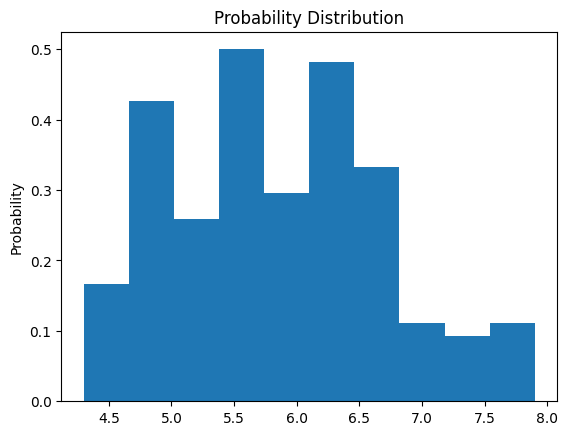

In [7]:
prob_dist(iris_df["sepal length (cm)"])

# Cumulative Distribution Function (CDF)

Calculate and plot cumulative distributive function of petal length feature.

In [8]:
def cdf(series):
  cdf  = series.cumsum() / series.sum()
  print(f"Cumulative distribution of the series is\n {cdf}")
  plt.hist(series, cumulative=True)

  plt.ylabel("Values")
  plt.title(f"Cumlative Distribution Function")
  plt.show()

Cumulative distribution of the series is
 0      0.002484
1      0.004967
2      0.007273
3      0.009934
4      0.012418
         ...   
145    0.963278
146    0.972148
147    0.981373
148    0.990953
149    1.000000
Name: petal length (cm), Length: 150, dtype: float64


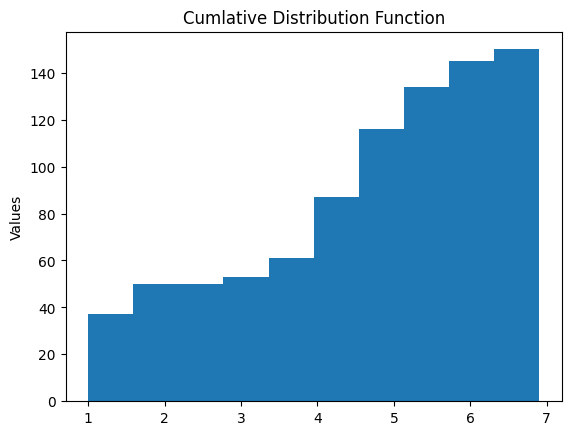

In [9]:
cdf(iris_df["petal length (cm)"])

# Probability Density Function (PDF)

Calculate and plot the probability density function for sepal width.

In [10]:
def pdf(series):
  hist, bins = np.histogram(series, density=True)
  bin_width = bins[1] - bins[0]
  pdf = hist * bin_width
  print(f"Probability density function of the series is\n {pdf}")
  plt.bar(bins[:-1], pdf)
  plt.title("Probability Density Function (PDF)")
  plt.xlabel("Value")
  plt.ylabel("Probability")
  plt.show()

Probability density function of the series is
 [0.02666667 0.04666667 0.14666667 0.16       0.24666667 0.20666667
 0.06666667 0.07333333 0.01333333 0.01333333]


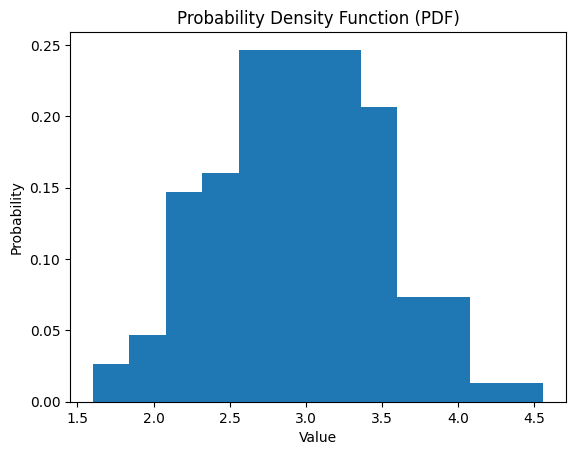

In [11]:
pdf(iris_df["sepal width (cm)"])

In [12]:
iris_df["petal length (cm)"].nunique()

43

#  Probability of a randomly selected iris flower

Calculate the probability of a randomly selected iris flower having length greater than a certain value.

In [52]:
def prob_est(value):
  petal_lengths = iris_df["petal length (cm)"]
  values_greater = (petal_lengths > value).sum()
  total_count = len(petal_lengths)
  prob = values_greater / total_count

  return prob

In [55]:
value = float(input(f"Enter any valid value of petal length (between {min(iris_df['petal length (cm)'])} and {max(iris_df['petal length (cm)'])})"))
prob_val = prob_est(value)
print(f"Probability of a flower having petal length greater than {value} cm is {prob_val:.2f}")

Enter any valid value of petal length (between 1.0 and 6.9)3.7
Probability of a flower having petal length greater than 3.7 cm is 0.62


# Hypothesis testing

hypothesis test to determine if there is a significant difference in the mean petal length between two species of iris flowers

In [73]:
from scipy import stats
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
versicolor_petl = iris_df[iris_df['species'] == 'versicolor']["petal length (cm)"]
virginica_petl = iris_df[iris_df['species'] == 'virginica']["petal length (cm)"]
t_stat, p_value = stats.ttest_ind(versicolor_petl, virginica_petl)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Rejecting the null hypothesis. There is a significant difference in the mean petal length between Versicolor and Virginica.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference in the mean petal length between Versicolor and Virginica.")

t-statistic: -12.603779441384985
p-value: 3.1788195478061495e-22
Rejecting the null hypothesis. There is a significant difference in the mean petal length between Versicolor and Virginica.


# Covariance and Correlation

In [69]:
cor_dpl_lw = iris_df[["sepal length (cm)", "sepal width (cm)"]].corr().iloc[0, 1]
cov_dpl_lw = iris_df[["sepal length (cm)", "sepal width (cm)"]].cov().iloc[0, 1]
print(f"Correlation between sepal length and sepal width is {cor_dpl_lw}")
print(f"Covariance between sepal length and sepal width is {cov_dpl_lw}")

Correlation between sepal length and sepal width is -0.11756978413300088
Covariance between sepal length and sepal width is -0.042434004474272924
